In [1]:
# Importing important liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# 1st Session

In [2]:
Bank_df = pd.read_csv("E:\InsideAIML\AIML Project\AIML_Banking_Query\content_for_cbatbot_project\BankFAQs.csv") 
# importing the datset
Bank_df

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
1768,Which languages do you speak,just English. But I'm trying to learn new lang...,accounts
1769,how much is interest for FD,7%,accounts
1770,how much is interest for Fixed Deposit,7%,accounts
1771,Fixed Deposit,7%,accounts


In [3]:
Bank_df['Answer'][205]

'You can plan your visit and access your locker on all working days during banking hours.'

In [4]:
Bank_df.isnull().sum() #finding the null values if are present in the dataset

Question    0
Answer      0
Class       0
dtype: int64

In [5]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [6]:
#importing new datset found on the internet
df_new = pd.read_csv("E:\InsideAIML\AIML Project\AIML_Banking_Query\content_for_cbatbot_project\BankFAQs from github.csv")

In [7]:
df_new.head()

,Question,Answer,Class
0,Do I need to enter ‘#’ after keying in my Card...,Please listen to the recorded message and foll...,security
1,What details are required when I want to perfo...,"To perform a secure IVR transaction, you will ...",security
2,How should I get the IVR Password if I hold a...,An IVR password can be requested only from the...,security
3,How do I register my Mobile number for IVR Pas...,Please call our Customer Service Centre and en...,security
4,How can I obtain an IVR Password,By Sending SMS request: Send an SMS 'PWD<space...,security


In [8]:
# Incorporating the two datasets so that we can find out more number of queries to pass to the model tfor training.
input_df = [Bank_df, df_new]
input_df = pd.concat(input_df, ignore_index = True)
input_df

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
3532,What if I forget my Prepaid NetBanking login P...,"If you have forgotten the Password, then the s...",cards
3533,What is the maximum value for which the Card c...,There is no limit imposed on the usage of Rega...,cards
3534,What options should I choose to withdraw cash ...,"Generally, the options available at the ATM fo...",cards
3535,What should I do and whom to contact if my car...,"In case your card gets lost or stolen, all you...",cards


In [9]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3537 non-null   object
 1   Answer    3537 non-null   object
 2   Class     3537 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [10]:
set(input_df.Class)

{'accounts',
 'cards',
 'fundstransfer',
 'insurance',
 'investments',
 'loans',
 'security'}

In [11]:
input_df.nunique()

Question    1521
Answer      1890
Class          7
dtype: int64

In [12]:
# checking the maximum counts present in which class
count = input_df['Class'].value_counts()
count

insurance        938
cards            806
loans            750
accounts         621
investments      280
security         114
fundstransfer     28
Name: Class, dtype: int64

# Plotting the Data so we can get more insights for further processing

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'accounts'),
  Text(1, 0, 'cards'),
  Text(2, 0, 'fundstransfer'),
  Text(3, 0, 'insurance'),
  Text(4, 0, 'investments'),
  Text(5, 0, 'loans'),
  Text(6, 0, 'security')])

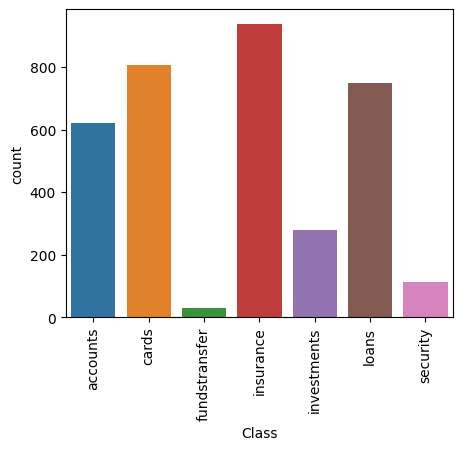

In [13]:
# Cleaned the data on the basis of null and duplicate values, Now Visualization
# Count Plot for class
plt.figure(figsize = (5,4))
sns.countplot(x = input_df['Class'])
plt.xticks(rotation = 90)

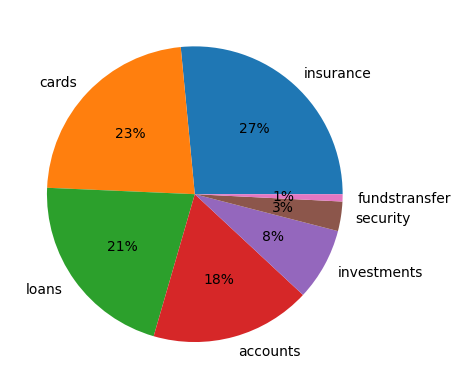

In [14]:
value_counts = input_df['Class'].value_counts()
plt.pie(value_counts.values,labels = value_counts.index,autopct = '%1.0f%%')
plt.show()

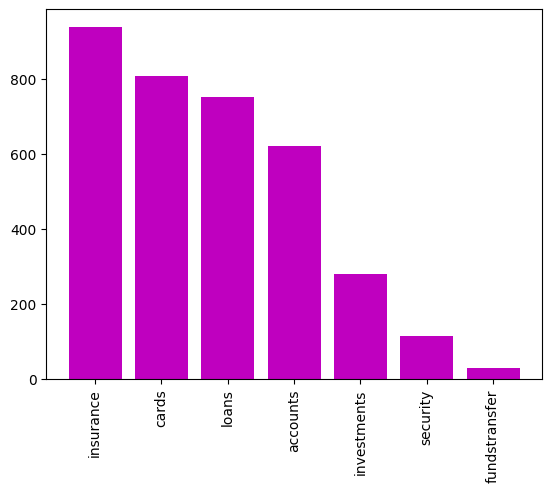

In [15]:
plt.figure()
plt.bar(count.index, count.values, color = 'm')
plt.xticks(rotation=90)
plt.show()
# from below bar graph we can conclude that the class insurance is having more weitage than any other class

# Cleaning the data

In [16]:
df = input_df

In [17]:
df['Question'].unique()

array(['What are the documents required for opening a Current Account of a sole proprietorship firm',
       'Can I transfer my Current Account from one branch to another',
       'My present status is NRI. What extra documents are required for opening a Sole Proprietorship Current Account',
       ..., 'Where I can earn ‘Thanks Again’ Reward Points',
       'Where I can redeem my ‘Thanks Again’ Reward points',
       'How close does the ‘tap/ wave’ have to be to the reader'],
      dtype=object)

In [18]:
#Removing Duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Question,Answer,Class
19,Can I access my account by telephone to conduc...,Yes you can. You can use PhoneBanking to perfo...,accounts
21,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
25,Can I access my account by telephone to conduc...,Yes you can. You can use PhoneBanking to perfo...,accounts
27,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
33,Can I access my account from any M&N Bank branch,Yes. All M&N Bank branches and systems are in...,accounts
...,...,...,...
3531,What if I Already Earn Rewards with My Card,If you register a reward card that already ear...,cards
3532,What if I forget my Prepaid NetBanking login P...,"If you have forgotten the Password, then the s...",cards
3533,What is the maximum value for which the Card c...,There is no limit imposed on the usage of Rega...,cards
3534,What options should I choose to withdraw cash ...,"Generally, the options available at the ATM fo...",cards


In [19]:
df.drop_duplicates(inplace = True)# Dropping the exact duplicated values
df = input_df.reset_index(drop = True) #resetting index 
df

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
2021,Can the value of the card be topped up,"Yes, your Regalia ForexPlus Card can be reload...",cards
2022,How to set Prepaid NetBanking Login User ID / ...,You may have received IPIN or Activation Code ...,cards
2023,Is Regalia ForexPlus Card enabled for MasterCa...,"Yes, Regalia ForexPlus Card offered on MasterC...",cards
2024,What documents should I submit when I purchase...,HDFC Bank Savings / Current account holders ne...,cards


In [20]:
df.shape

(2026, 3)

In [21]:
#This column Questions from different users, which are longer in length, 
#and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. 
#also there are some contractions are present so we have to remove them and get to its root word.
for index,text in enumerate(df['Question'][35:40]):
  print('Question %d:\n'%(index+1),text)

Question 1:
 Is it necessary to open Max Current Account in each location where my company has an office
Question 2:
 What is the initial deposit amount required to open a Max Current account
Question 3:
 What is the minimum balance that I need to maintain in a Max Current Account
Question 4:
 How is M&N  Bank's Max Current account different from a regular Current Account
Question 5:
 Must I open an account in each location where I have my company office


# Expand Contractions


In [22]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
type(contractions_dict)

dict

In [23]:
#expression for finding the contraction
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#function for finding the contraction
def exp_contra(text, contractions_dict = contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# expanding the contractions in the Question columnm only

df['Question'] = df['Question'].apply(lambda x : exp_contra(x))

# Lowercasing the words

In [24]:
# in nlp, models treat words like Men and men differently
# to overcome the problem we lowercase the words
# lowercasing both the Question and Answer Column
#using lambda function
df['Question'] = df['Question'].apply(lambda x : x.lower())
for index,text in enumerate(df['Question'].loc[5:10]):
  print('Question %d:\n'%(index+1),text)

Question 1:
 what are the documents required for opening current account of a company
Question 2:
 who can be a partner in a partnership firm
Question 3:
 what is the time taken to realize outstation cheques
Question 4:
 can an individual open a current account
Question 5:
 can eefc account be opened by special economic zone (sez) units
Question 6:
 what should i do in case i am unable to access my company is current account


# Removing Punctuation & special character Which found in the dataset

In [25]:
stop_words = set(stopwords.words('english')) #Defining variable for stopwords

In [26]:
df['Question'][210]

'what happens if i do not use my savings account for a very long time'

In [27]:
from nltk import word_tokenize

In [28]:
def data_cleaning(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Removing the punctuations
    text = re.sub(r'\w*\d+\w*', '', text) # Removing the numbers
    text = re.sub('\n', '', text)# Removing special characters
    text = text.encode('ascii','ignore').decode() # Removing unicode characters
    word_tok = word_tokenize(text) # Tokenizing the text
    filtered_text = [w for w in word_tok if not w in stop_words] # Removing stop words
    return " ". join(filtered_text)

In [29]:
df['Question'] = df['Question'].apply(data_cleaning)# Applying previously defined function to the Question column for data cleaning

In [30]:
df['Question'][210]

'happens use savings account long time'

In [31]:
df['Answer'][210]

"The account becomes dormant if there are no customer initiated transactions (excludes system generated transactions like credit interest, debit interest), in the account for a continuous period of two years. If the account status is 'Dormant', transactions through Direct Banking Channels like ATM, NetBanking, PhoneBanking are not be allowed by the Bank."

# Removing the Extra spaces

In [32]:
df['Question'] = df['Question'].apply(lambda x: re.sub(' +', ' ', x))

# Stop words Removal & Lemmatization

In [33]:
df['Question'][206]

'entitled kind benefits account salary account'

In [34]:
import spacy

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

#lemmatization with stop words removal
df['Question'] = df['Question'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [35]:
df['Question'][206]

'entitle kind benefit account salary account'

# Label encoding the Class column

In [36]:

# Import label encoder
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()  
# Encode labels in column 'Class'.
df['Class']= LE.fit_transform(df['Class'])
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# Applying train test split

In [37]:
x = df["Question"].values
x# Taking the IDV as 'x' and converting to array

array(['document require open current account sole proprietorship firm',
       'transfer current account branch',
       'present status nri extra document require open sole proprietorship current account',
       ..., 'regalia forexplus card enable mastercard secure pass',
       'document submit purchase regalia forexplus card',
       'contact card lose'], dtype=object)

In [38]:
y = df['Class'].values #Taking the DV as 'y' and converting it into array
y

array([0, 0, 0, ..., 1, 1, 1])

# Applying Tfid

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_vect = vect.fit_transform(x)

In [40]:
x_vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
df_vect = pd.DataFrame(x_vect.todense(), columns = vect.get_feature_names_out())
df_vect

,able,abroad,accept,access,accessory,accident,accidental,account,accumulate,acknowledgement,...,withdrawal,woman,womans,work,world,write,year,yearly,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185775,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303552,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148354,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191251,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Applying train test split 
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, test_size = 0.20, random_state = 30)
print("Train set -", x_train.shape, y_train.shape)
print("Test set -", x_test.shape, y_test.shape)

Train set - (1620, 1014) (1620,)
Test set - (406, 1014) (406,)


In [43]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [44]:
print("Accuracy_score- ", f1_score(y_test, y_pred, average = 'weighted') * 100)

Accuracy_score-  95.81956887505052


In [45]:
print("Precision_score- ", precision_score(y_test,y_pred, average = 'weighted') * 100)

Precision_score-  95.96617711790125


In [46]:
print("Accuracy_score ", accuracy_score(y_test,y_pred) * 100)

Accuracy_score  95.8128078817734


In [47]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [48]:
pickle.dump(classifier,open('model1.pkl','wb'))
pickle.dump(vect,open('vectorizer.pkl','wb'))

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
Input_question = "happens use savings account long time"
vectorizer = TfidfVectorizer()
## Create a TF-IDF vectorizer to convert the text data and query to a vector representation
vectorizer.fit_transform(df['Answer'].values.tolist() + [Input_question])
# Get the vector representation of the question and answer
answer_vectors = vectorizer.transform(df['Answer']).toarray()
test_vector = vectorizer.transform([Input_question]).toarray()
# Calculate the cosine similarity between both vectors
cosine_sims = cosine_similarity(answer_vectors, test_vector)
# Get the index of the most similar text to the query
most_similar_idx = np.argmax(cosine_sims)
# Print the most similar text as the answer to the query
print(df.iloc[most_similar_idx]['Answer'])

For all options other than Life Long Protection and 3D Life Long Protection options â€“ 5 to 40 years For Life Long Protection and 3D Life Long Protection options â€“ Whole of Life
